# Summer Olympics Data Analysis Assignment

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
df=pd.read_csv('Summer.csv')

In [16]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


### 1. In how many cities Summer Olympics is held so far?

In [17]:
ct=df['City'].unique()
print('no. of cities:',len(ct))
print('cities:',ct)

no. of cities: 22
cities: ['Athens' 'Paris' 'St Louis' 'London' 'Stockholm' 'Antwerp' 'Amsterdam'
 'Los Angeles' 'Berlin' 'Helsinki' 'Melbourne / Stockholm' 'Rome' 'Tokyo'
 'Mexico' 'Munich' 'Montreal' 'Moscow' 'Seoul' 'Barcelona' 'Atlanta'
 'Sydney' 'Beijing']


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [77]:
sp=df[['Sport','Medal']]
gl=sp[sp.Medal == 'Gold'].value_counts().to_frame('Total gold medals').reset_index()
gl=gl.set_index('Sport')
del gl['Medal']
gt= pd.DataFrame(gl[0:5])
gt

,Total gold medals
Sport,
Aquatics,1421
Athletics,1215
Rowing,890
Gymnastics,820
Fencing,552


<AxesSubplot:xlabel='Sport'>

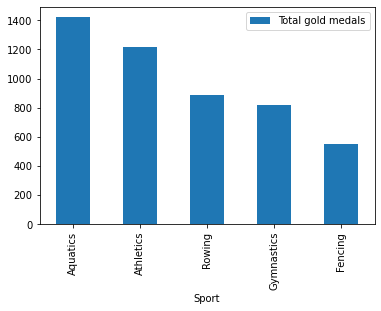

In [78]:
gt.plot.bar()

### 3. Which sport is having most number of medals so far? (Top 5)

In [89]:
ml =df.Sport.value_counts().to_frame('Total medals').reset_index()
ml.rename(columns={'index':'Sport'},inplace=True)
ml=ml.set_index('Sport')
ms=pd.DataFrame(ml[0:5])
ms

,Total medals
Sport,
Aquatics,4170
Athletics,3638
Rowing,2667
Gymnastics,2307
Fencing,1613


<AxesSubplot:xlabel='Sport'>

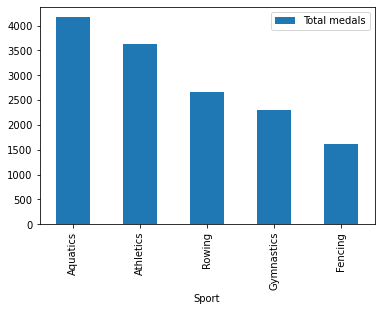

In [90]:
ms.plot.bar()

### 4. Which player has won most number of medals? (Top 5)

In [92]:
df['Athlete'].value_counts()[:5].index.tolist()

['PHELPS, Michael',
 'LATYNINA, Larisa',
 'ANDRIANOV, Nikolay',
 'SHAKHLIN, Boris',
 'MANGIAROTTI, Edoardo']

# OR

PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
SHAKHLIN, Boris         13
MANGIAROTTI, Edoardo    13
Name: Athlete, dtype: int64


<AxesSubplot:>

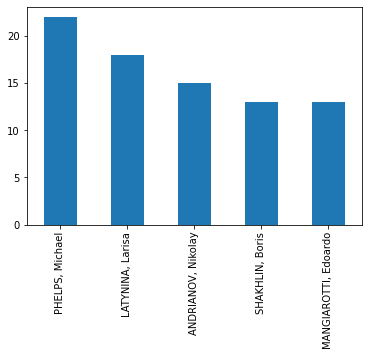

In [95]:
print(df['Athlete'].value_counts()[0:5])
df['Athlete'].value_counts()[0:5].plot.bar()

### 5. Which player has won most number Gold Medals of medals? (Top 5)

                  Total gold medals
Athlete                            
PHELPS, Michael                  18
LEWIS, Carl                       9
NURMI, Paavo                      9
SPITZ, Mark                       9
LATYNINA, Larisa                  9


<AxesSubplot:xlabel='Athlete'>

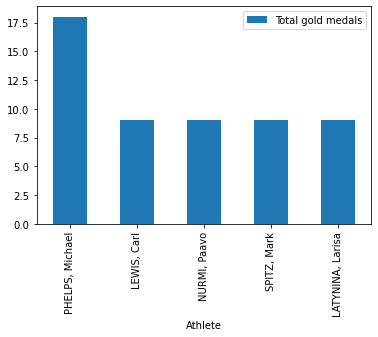

In [97]:
ap=df[['Athlete','Medal']]
dl=ap[ap.Medal == 'Gold'].value_counts().to_frame('Total gold medals').reset_index()
dl=dl.set_index('Athlete')
del dl['Medal']
dt= pd.DataFrame(dl[0:5])
print(dt)
dt.plot.bar()

### 6. In which year India won first Gold Medal in Summer Olympics?

In [111]:
df[(df.Country == 'IND') & (df.Medal == 'Gold')][0:1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


### 7. Which event is most popular in terms on number of players? (Top 5)

In [104]:
data=[]
for sport in df['Event'].unique():
    data.append([sport,len(df[df['Event']==sport])])
data=pd.DataFrame(data, columns=['Event','No. of players']) 
data=data.sort_values(by='No. of players', ascending=False).head()
data

,Event,No. of players
80,Football,1497
176,Hockey,1422
138,Team Competition,1147
327,Basketball,1012
337,Handball,973


<AxesSubplot:xlabel='Event'>

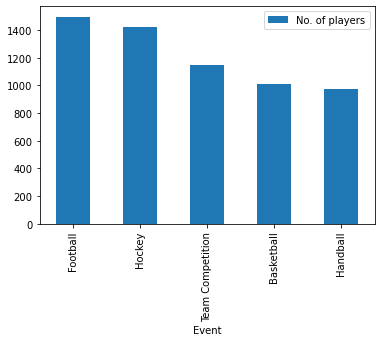

In [105]:
data.plot(x='Event',y='No. of players',kind='bar')


### 8. Which sport is having most female Gold Medalists? (Top 5)

In [106]:
womenInOlympics = df[(df.Gender == 'Women') & (df.Medal == 'Gold')]
data=[]
for sport in womenInOlympics['Sport'].unique():
    data.append([sport,len(womenInOlympics[womenInOlympics['Sport']==sport])])
data=pd.DataFrame(data, columns=['Sport','No. of female gold medalists']) 
data=data.sort_values(by='No. of female gold medalists', ascending=False).head()
data

,Sport,No. of female gold medalists
4,Aquatics,589
7,Athletics,389
8,Gymnastics,268
14,Rowing,217
11,Volleyball,166


<AxesSubplot:xlabel='Sport'>

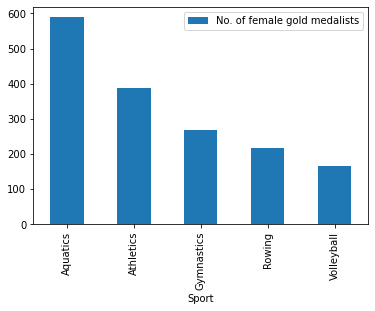

In [107]:
data.plot(x='Sport',y='No. of female gold medalists',kind='bar')